In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import sklearn
from sklearn.metrics import classification_report, accuracy_score
from more_itertools import sort_together
%matplotlib inline

In [105]:
# Data preparation
title="white_3class_balanced"
data = pd.read_csv("data/" + title + ".csv")
print(data.shape)
data.head()
X= data.iloc[:,:-1].values
y=data.iloc[:,-1].values

(6594, 14)


In [106]:
from sklearn.model_selection import train_test_split
seed=7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5275, 13), (1319, 13), (5275,), (1319,))

In [92]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

0.9491071428571428


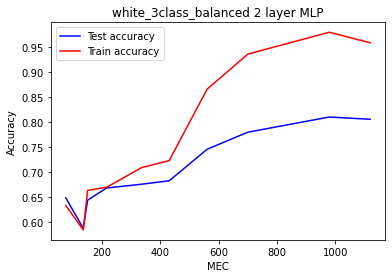

In [96]:
from sklearn.neural_network import MLPClassifier
input_size = 11
hidden_sz_2layer = [[10,5],[5,10],[10, 20],[15,20],[25, 10],[30,40],[40,40],[50,50],[70,70],[80,80]]
num_classes = 3

MECs = []
test_accs = []
train_accs = []
seed2=0

for h in hidden_sz_2layer:
    mlp = MLPClassifier(
        hidden_layer_sizes=h, 
        random_state=seed2,
        activation='relu',
        max_iter=10000,
        verbose=False,
        early_stopping=True,
        n_iter_no_change=100
    )
    mlp.fit(X_train,y_train)
    y_test_pred = mlp.predict(X_test)
    y_train_pred = mlp.predict(X_train)
    MEC = (input_size + 1) * h[0] + min(h[0], h[1]*(h[0] + 1)) + min(h[1], (h[1] + 1)*num_classes)
    train_acc = sum(y_train == y_train_pred) / len(y_train)
    test_acc = sum(y_test == y_test_pred) / len(y_test)
    MECs.append(MEC)
    train_accs.append(train_acc)
    test_accs.append(test_acc)



train_sorted = sort_together([MECs, train_accs])[1]
test_sorted = sort_together([MECs, test_accs])[1]
MECs_sorted = sorted(MECs)

generalization = test_sorted[-1] * len(y_test) / MECs_sorted[-1]
print(generalization)


plt.plot(MECs_sorted, test_sorted, "-b", label="Test accuracy")
plt.plot(MECs_sorted, train_sorted, "-r", label="Train accuracy")
plt.xlabel("MEC")
plt.ylabel("Accuracy")
plt.title(title + " 2 layer MLP")
plt.legend(loc="upper left")
plt.show()

In [98]:
MECs_sorted

[75, 135, 150, 215, 335, 430, 560, 700, 980, 1120]

1.408


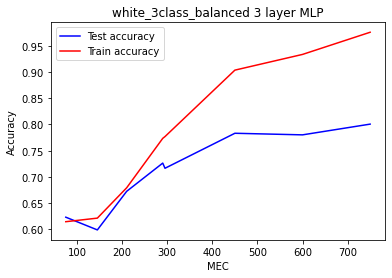

In [94]:
from sklearn.neural_network import MLPClassifier
input_size = 11
hidden_sz_3layer = [[10, 10, 5],[20,20,10],[15,10,5],[20, 15, 20], [5,5,5],[30,30,30],[40,40,40],[50,50,50]]
num_classes = 3

MECs = []
test_accs = []
train_accs = []
seed2=7

for h in hidden_sz_3layer:
    mlp = MLPClassifier(
        hidden_layer_sizes=h, 
        random_state=seed2,
        activation='relu',
        max_iter=10000,
        verbose=False,
        early_stopping=True,
        n_iter_no_change=100
    )
    mlp.fit(X_train,y_train)
    y_test_pred = mlp.predict(X_test)
    y_train_pred = mlp.predict(X_train)
    train_acc = sum(y_train == y_train_pred) / len(y_train)
    test_acc = sum(y_test == y_test_pred) / len(y_test)
    MEC = (input_size + 1) * h[0] + min(h[0], h[1]*(h[0] + 1)) + min(h[1], (h[1] + 1)*h[2]) + min(h[2], (h[2] + 1)*num_classes)
    MECs.append(MEC)
    train_accs.append(train_acc)
    test_accs.append(test_acc)



train_sorted = sort_together([MECs, train_accs])[1]
test_sorted = sort_together([MECs, test_accs])[1]
MECs_sorted = sorted(MECs)

generalization = test_sorted[-1] * len(y_test) / MECs_sorted[-1]
print(generalization)

plt.plot(MECs_sorted, test_sorted, "-b", label="Test accuracy")
plt.plot(MECs_sorted, train_sorted, "-r", label="Train accuracy")
plt.xlabel("MEC")
plt.ylabel("Accuracy")
plt.title(title + " 3 layer MLP")
plt.legend(loc="upper left")
plt.show()